<a href="https://colab.research.google.com/github/hecescam/IA3/blob/main/Hunger_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

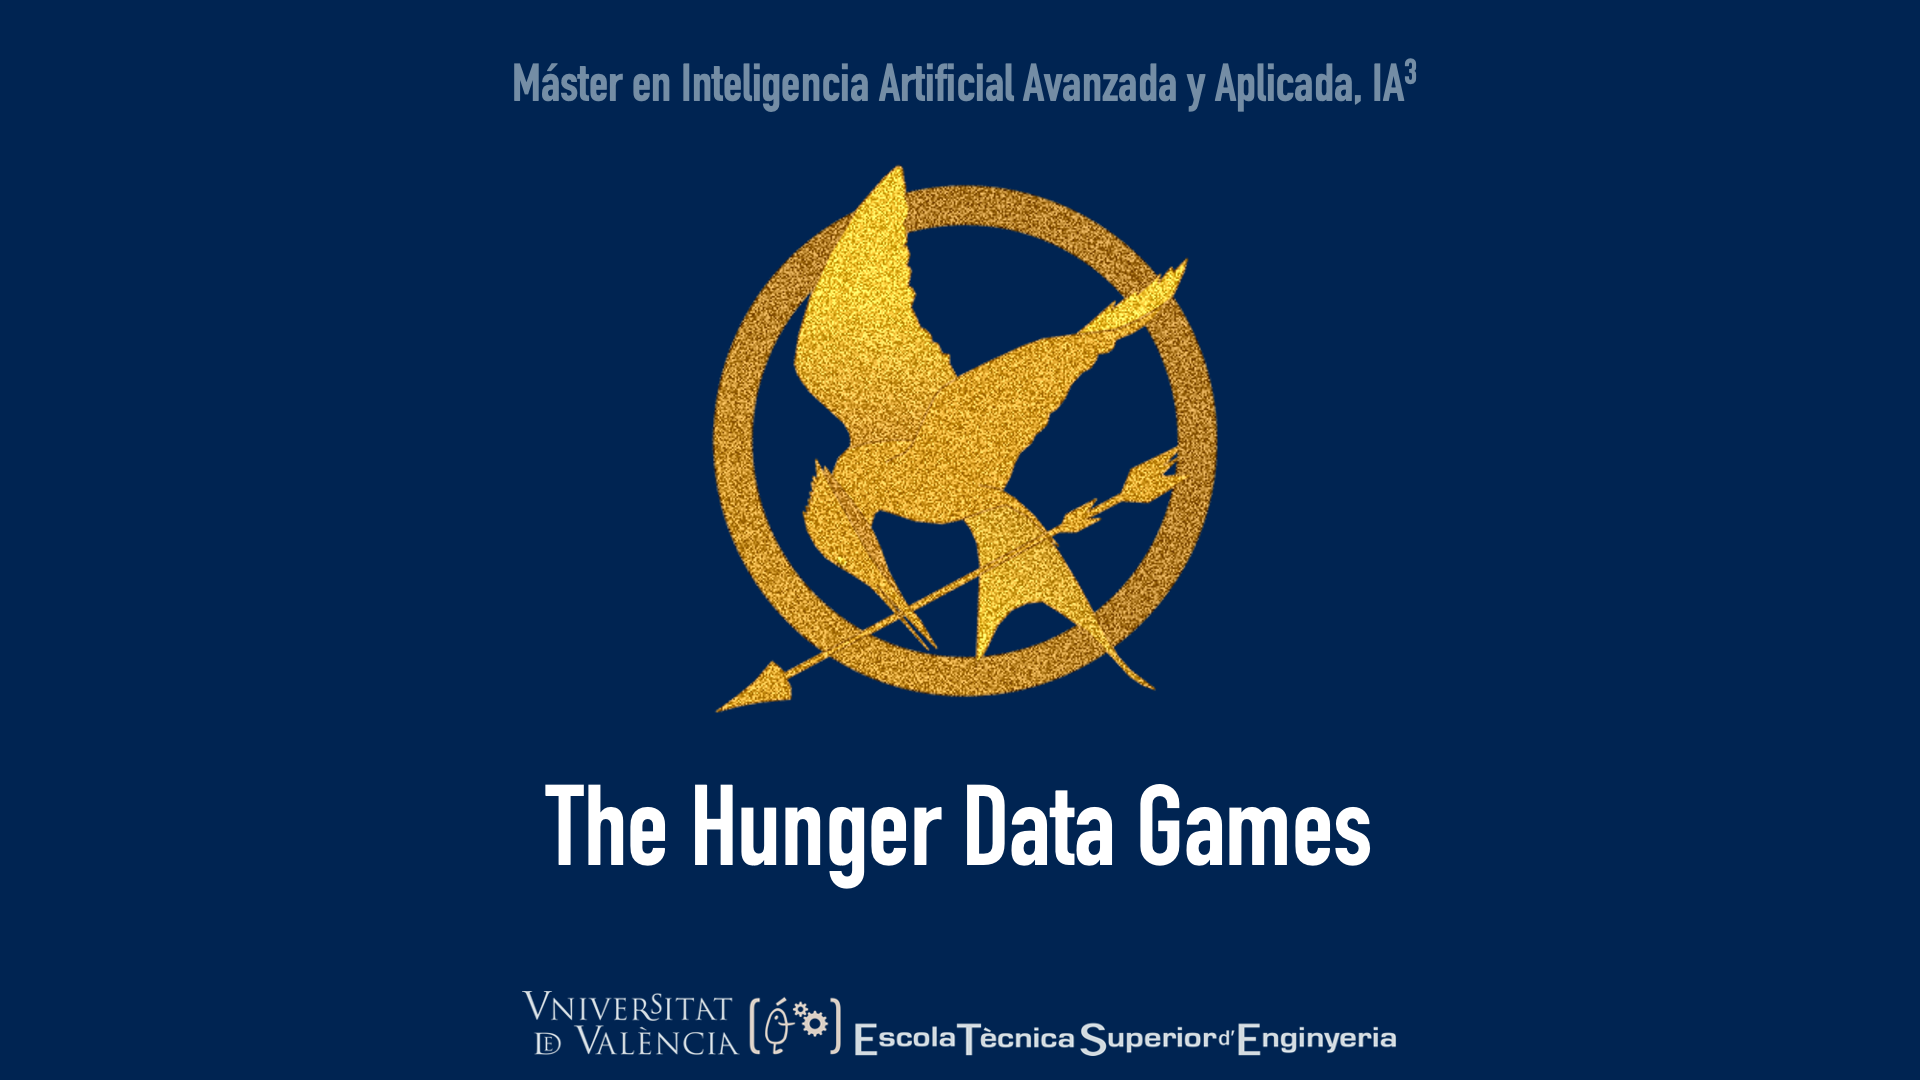

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



## Import Libraries and Loading the Dataset

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/hunger_data.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.drop("Unnamed: 0", axis=1, inplace=True)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [6]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
8,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
9,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

## Dataframe size

In [7]:
dataframe.shape

(117, 10)

## Descriptive statistics

In [ ]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.518621,13.387436,2.509145,1.411624,72.673590,0.537607,9.128889,0.168034,0.061880,2.829060
std,0.003525,0.918562,1.535116,0.528611,0.881914,0.837398,1.607853,0.508017,0.106528,2.154749
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516550,12.860000,0.780000,1.160000,72.340000,0.120000,8.240000,0.000000,0.000000,1.000000
50%,1.517760,13.240000,3.470000,1.320000,72.860000,0.550000,8.710000,0.000000,0.000000,2.000000
75%,1.519770,13.830000,3.580000,1.620000,73.100000,0.610000,9.490000,0.000000,0.100000,5.000000
max,1.533930,17.380000,4.490000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## We check for null data

In [8]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

## We separate the features and the target in different dataframes
### - Dataframe features ("matrix X")

In [10]:
X=dataframe.drop(columns='type_of_glass')
X

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00
...,...,...,...,...,...,...,...,...,...
112,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
113,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00
114,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00
115,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00


### - Dataframe target variable ('Y')

In [11]:
Y=dataframe.loc[:,['type_of_glass']]
Y

,type_of_glass
0,1
1,1
2,2
3,2
4,1
...,...
112,1
113,5
114,2
115,2


## Correlation of features

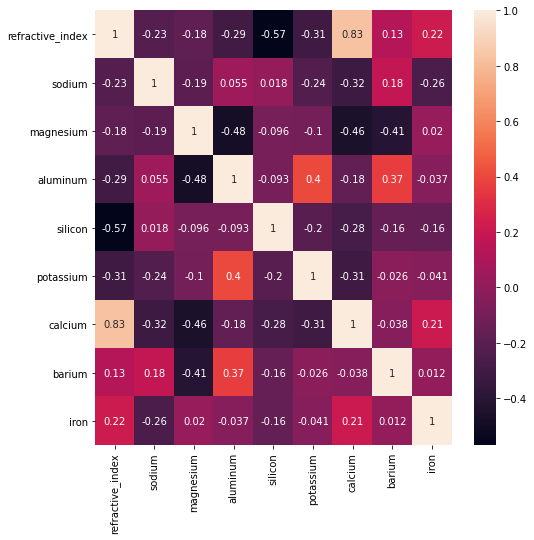

In [17]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Target variable distribution (Class Balance Analysis)


In [18]:
Y['type_of_glass'].unique()

array([1, 2, 7, 6, 3, 5])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



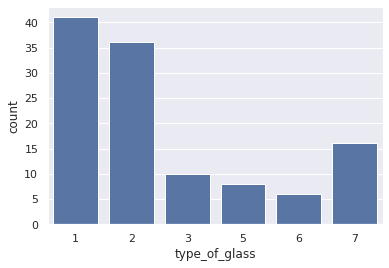

In [27]:
sns.set_theme(style="darkgrid")
sns.countplot(Y['type_of_glass'],color='b')


### -There are unbalanced classes and there is no class 4

## Visualize data distribution

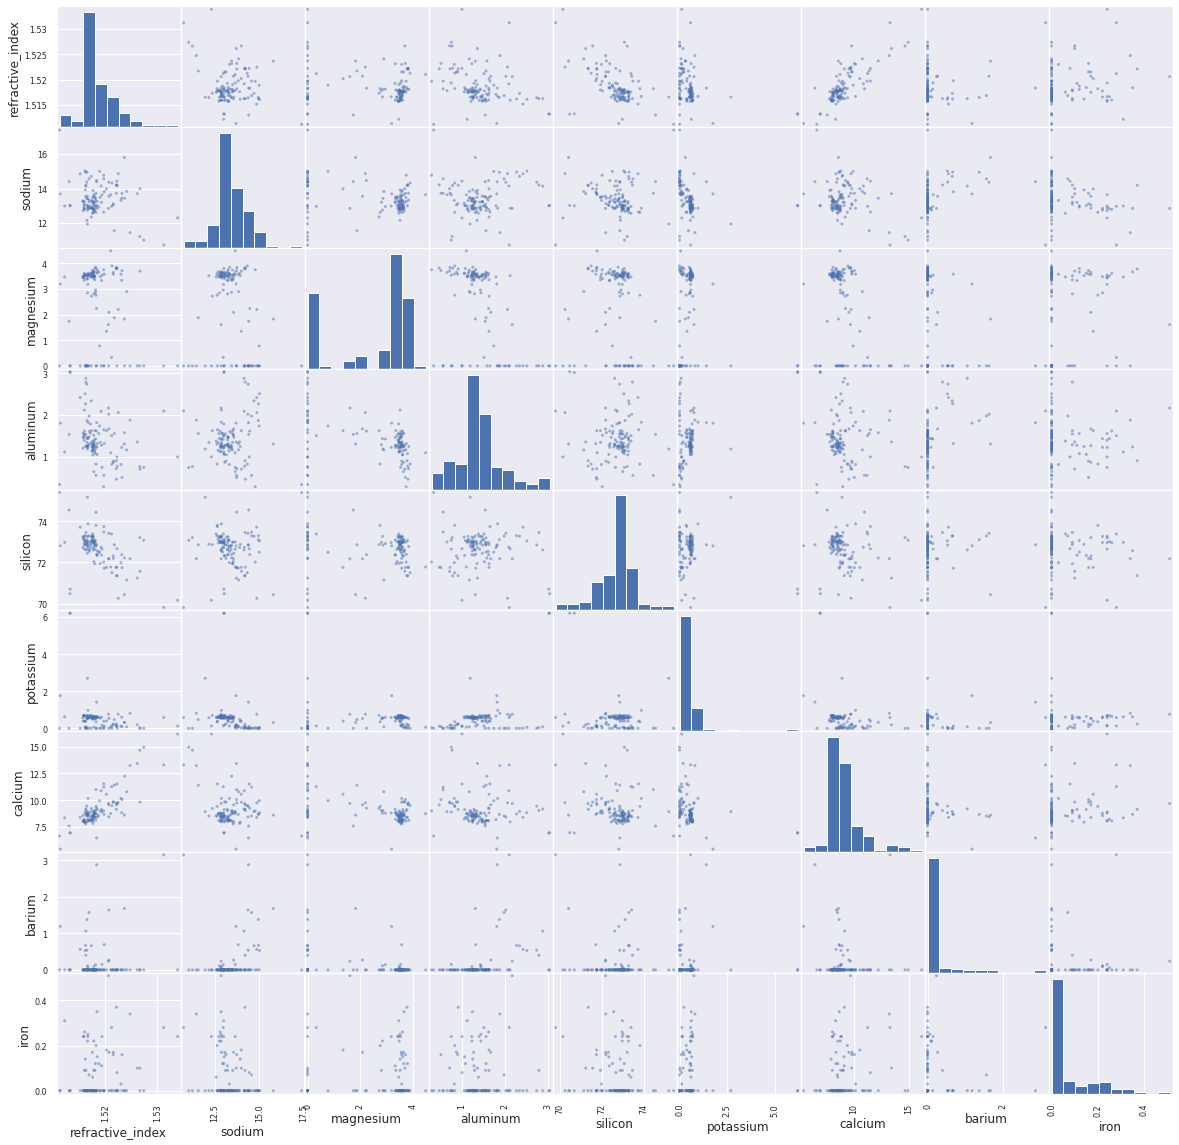

In [28]:
pd.plotting.scatter_matrix(X, figsize=(20.0,20.0)); 

In [29]:
fig = px.scatter(dataframe, x="calcium", y="refractive_index" , color="type_of_glass")
fig.show()

## Outlier Analysis

In [88]:
fig = make_subplots(rows=5, cols=2,column_widths=[5,5],row_heights=[100,100,100,100,100],specs=[[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},None]],vertical_spacing=0.075,horizontal_spacing=0.08)

n=0
for i in range(1,6):
  for j in range(1,3):
    fig.append_trace(go.Box(x = np.array(Y['type_of_glass']), y = np.array(X[X.columns[n]]),boxpoints='all',name=X.columns[n]), row = i, col = j)
    n+=1
    if n==len(X.columns):
      break

fig.update_layout(title_text="OUTLIER ANALYSIS")
fig.show()

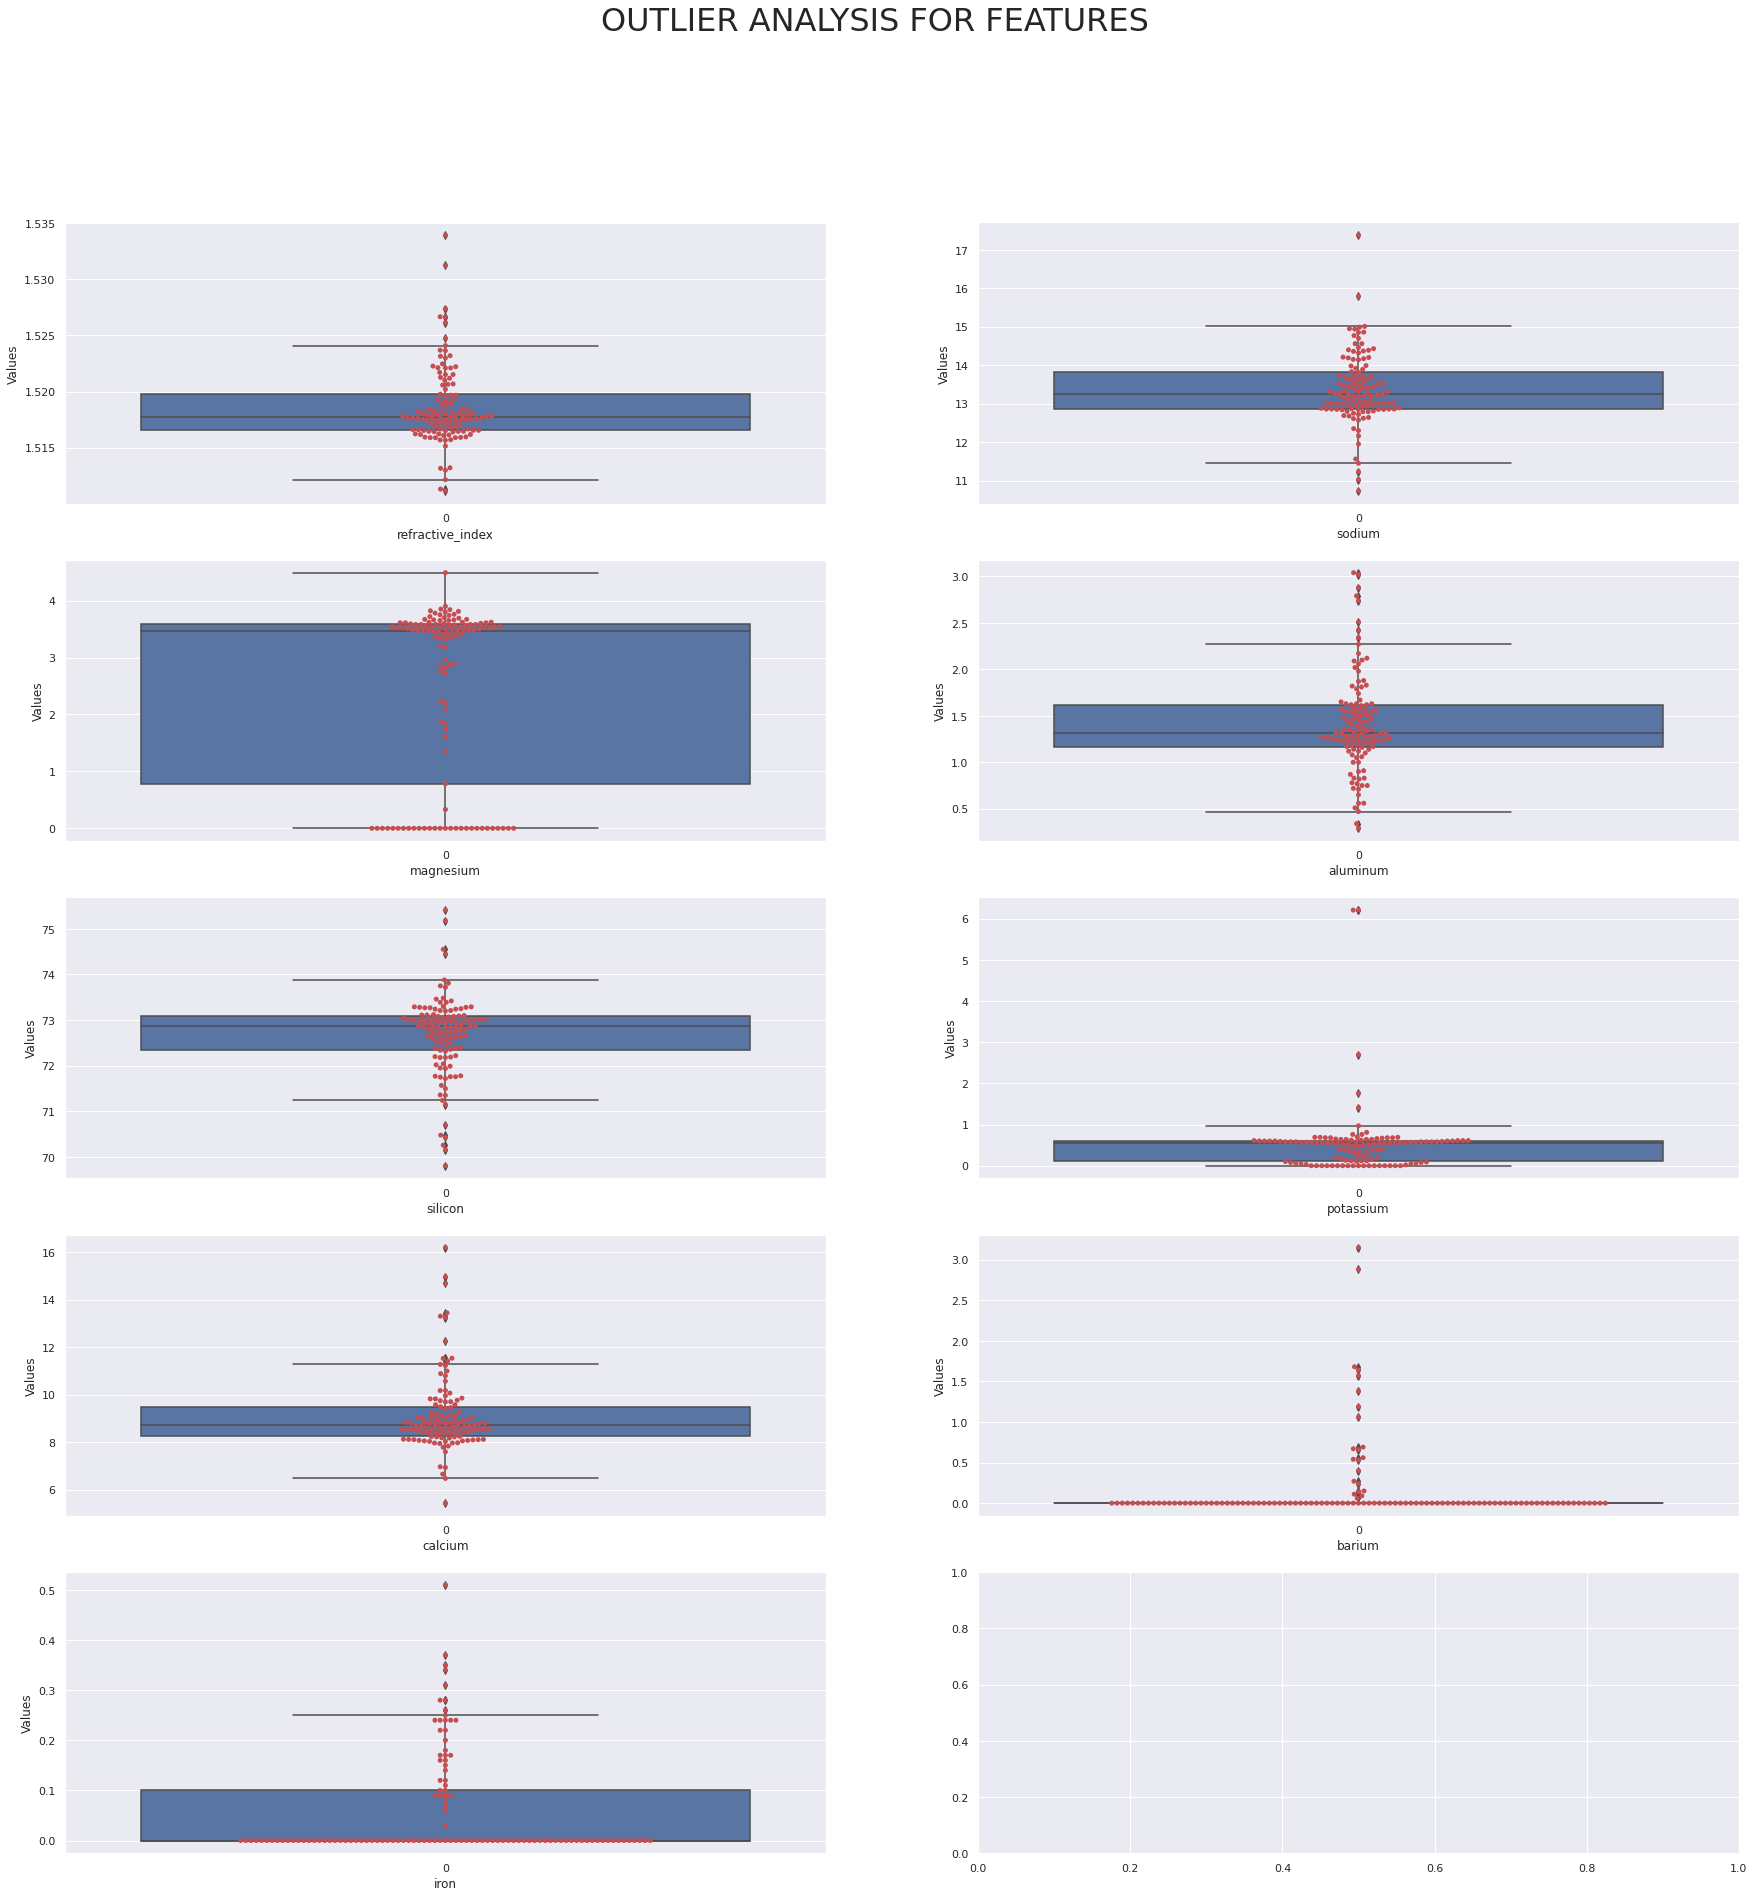

In [89]:
f, axes = plt.subplots(5, 2,figsize=(30, 30))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(data=X[X.columns[n]] ,ax=axes[i,j])
    sns.swarmplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES', fontsize=32)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



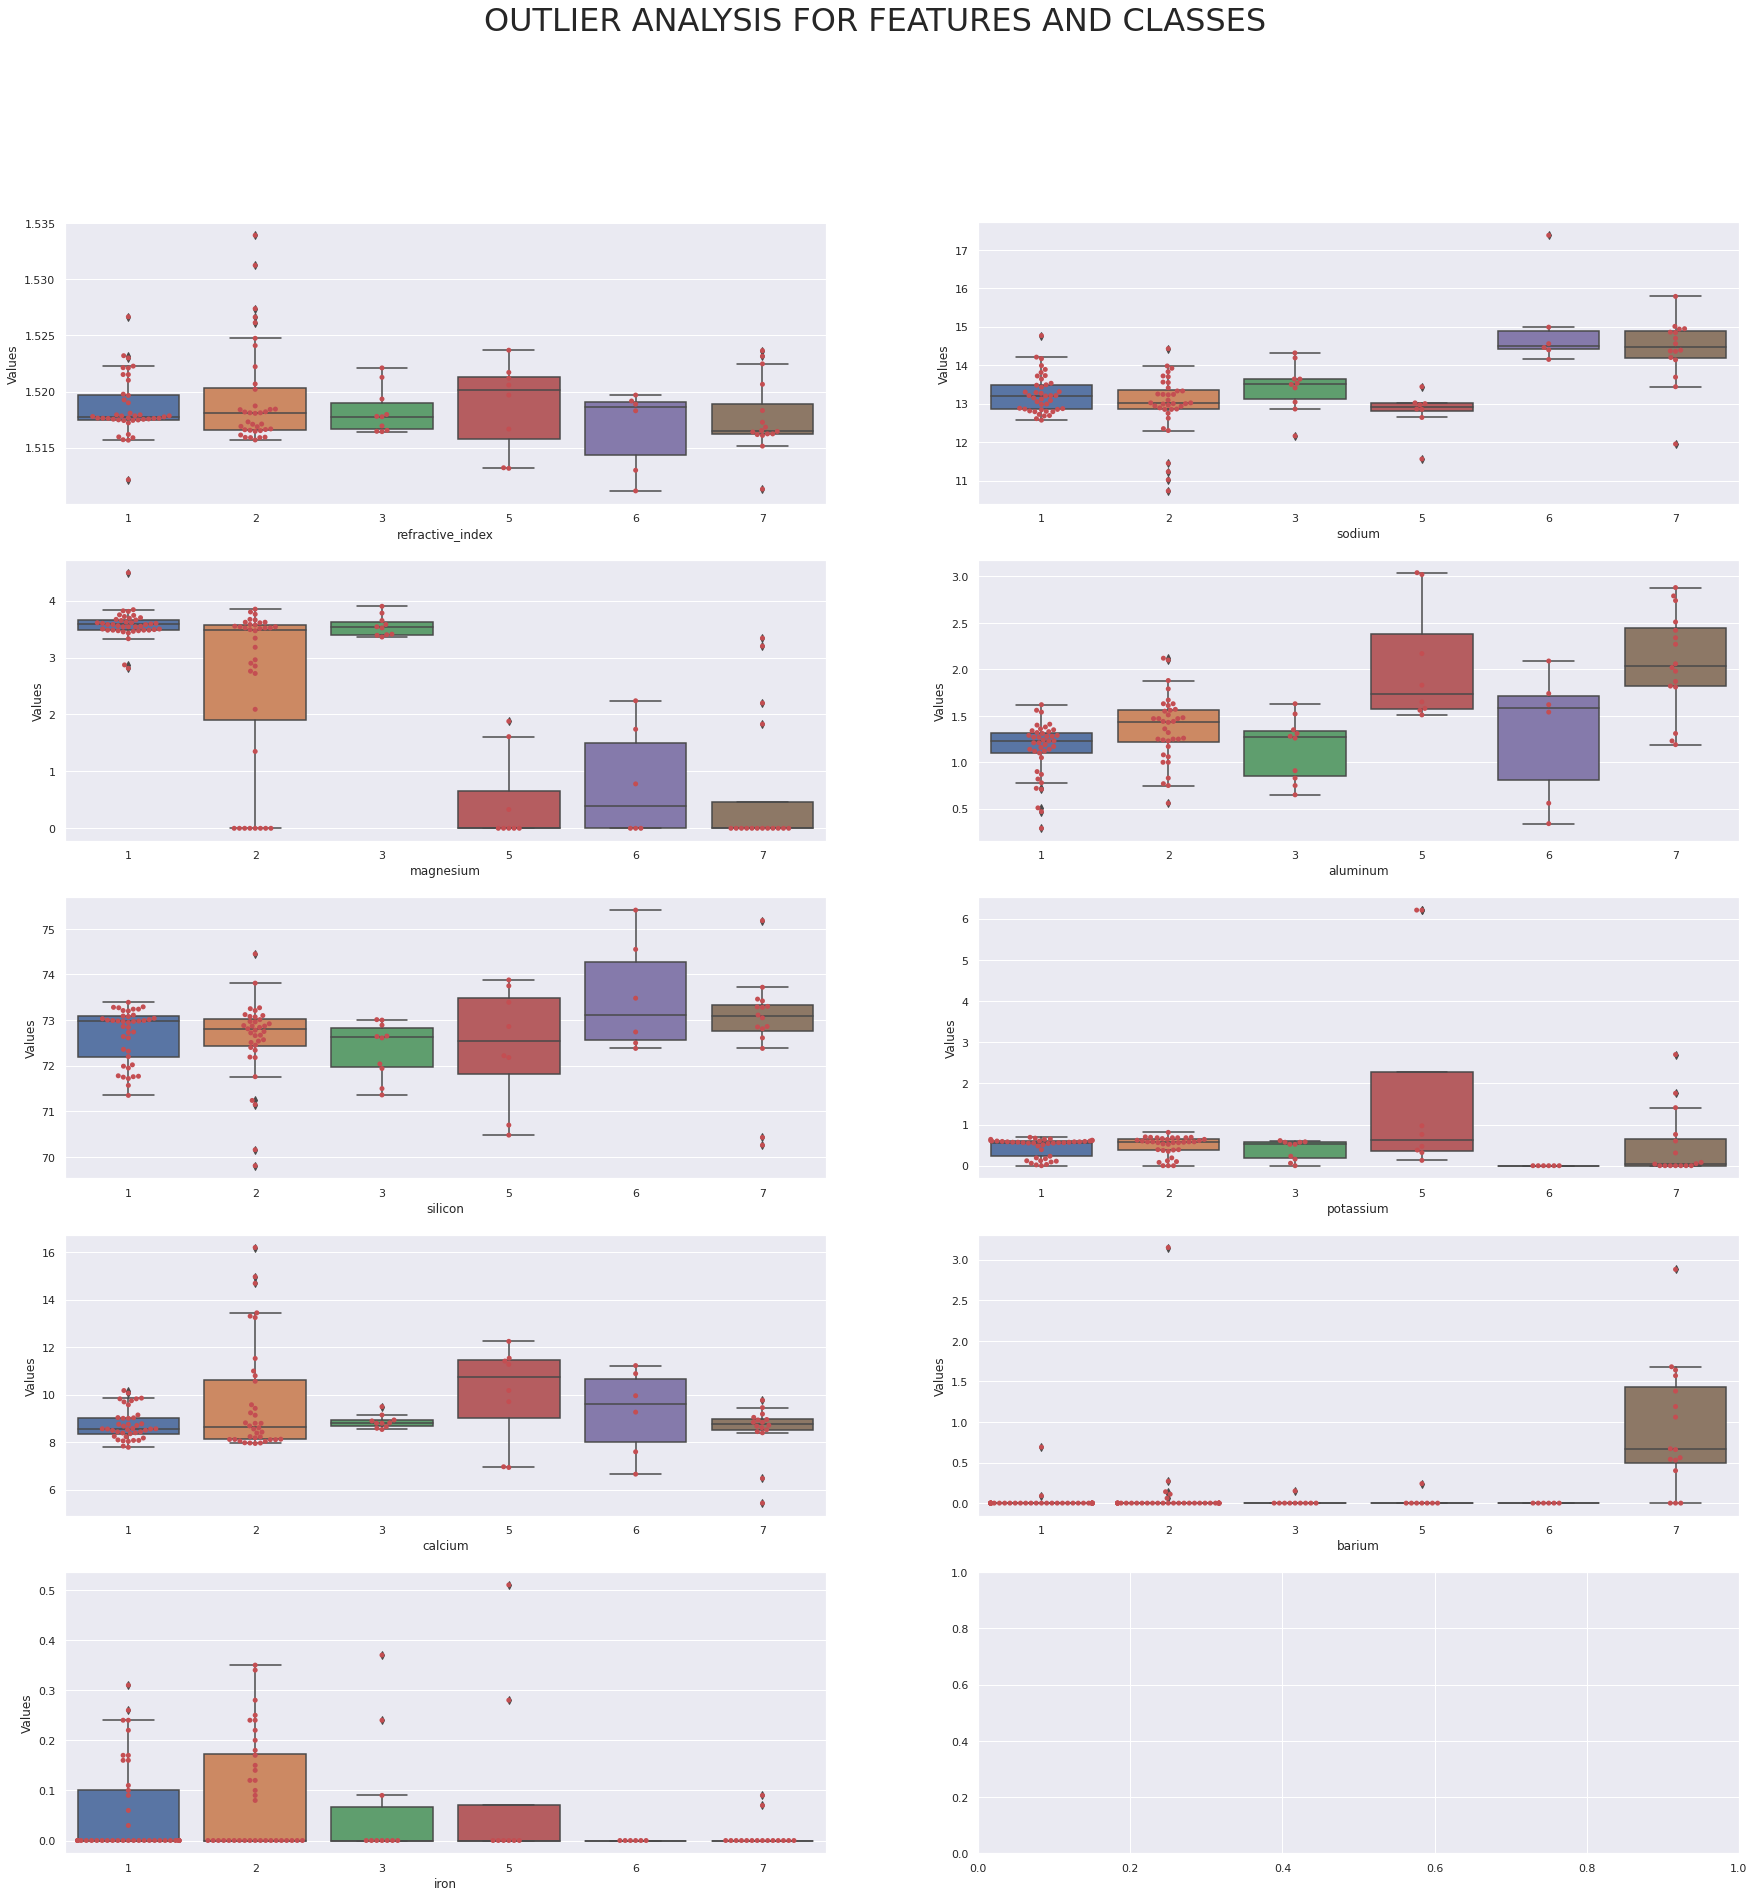

In [86]:

f, axes = plt.subplots(5, 2,figsize=(30, 30))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=Y['type_of_glass'],y=X[X.columns[n]],ax=axes[i,j])
    sns.swarmplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES AND CLASSES', fontsize=32)
plt.show()

## Train Test Split

In [90]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Normalize numeric features
### - StandardScaler of Sklearn to X_train

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
X_train_scaled

### - Normalize X_test

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
X_test_scaled

## Normalizamos las variables numericas
### - Aplicamos el StandardScaler de Sklearn

In [ ]:
scaled_features = StandardScaler().fit_transform(X)
scaled_features

array([[-0.77817568, -0.55480048,  0.60244017, ..., -0.67389804,
        -0.33218743,  1.67924128],
       [-0.2738968 , -0.19399795,  0.77253698, ..., -0.56771225,
        -0.33218743, -0.58338325],
       [-0.05167221, -0.1502643 ,  0.81833228, ..., -0.4427878 ,
        -0.33218743, -0.58338325],
       ...,
       [-0.1456903 , -0.4673332 ,  0.29495748, ..., -0.21167755,
        -0.05542089, -0.58338325],
       [-0.37646199, -1.13427123,  0.13794504, ...,  0.06315625,
        -0.33218743, -0.58338325],
       [ 0.68052933,  0.27613869,  1.29591177, ..., -0.23666244,
        -0.33218743, -0.58338325]])

### - Estos nos devuelve un array de numpy por lo tanto hay que pasarlo a Dataframe

In [ ]:
X_normalize = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)


,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,-0.778176,-0.554800,0.602440,-0.022084,0.690565,0.182767,-0.673898,-0.332187,1.679241
1,-0.273897,-0.193998,0.772537,-0.231072,-0.072414,0.038849,-0.567712,-0.332187,-0.583383
2,-0.051672,-0.150264,0.818332,-0.174075,-0.311557,0.050843,-0.442788,-0.332187,-0.583383
3,1.746068,-2.118278,-1.641529,0.889862,-0.550700,0.326684,2.567892,-0.332187,2.622002
4,0.327249,0.462007,0.700573,-0.174075,-1.085924,-0.500841,-0.286632,1.031876,-0.583383
...,...,...,...,...,...,...,...,...,...
112,-0.402103,-0.565734,0.635151,-0.155076,0.417259,0.026856,-0.436542,-0.332187,-0.583383
113,0.879962,-1.998011,-0.411598,0.281898,0.212279,-0.081082,1.424833,-0.332187,-0.583383
114,-0.145690,-0.467333,0.294957,0.034912,0.280606,0.074829,-0.211678,-0.055421,-0.583383
115,-0.376462,-1.134271,0.137945,0.414890,0.223667,0.194760,0.063156,-0.332187,-0.583383
